In [34]:
import pandas as pd

# 데이터 불러오기
file_path = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/wine.csv"
df = pd.read_csv(file_path)
# 결측치 확인
print(df.isnull().sum())
df.head()


Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X, y 분리
X = df.drop('Wine', axis=1)
y = df['Wine']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"==== {name} ====")
    print(classification_report(y_test, y_pred))


==== Decision Tree ====
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93        14
           3       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

==== Random Forest ====
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

==== Logistic Regression ====
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        

In [37]:
# 딥러닝 모델 분석 (TensorFlow 필요)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 라벨 값 1~3 → 0~2로 변경
y_train = y_train - 1
y_test = y_test - 1

# 딥러닝 모델 정의
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 클래스 수 3 → softmax
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model_history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# 평가
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")



Epoch 1/50


C:\Users\이예일\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6127 - loss: 0.9721 - val_accuracy: 0.7778 - val_loss: 0.8653
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7961 - loss: 0.8526 - val_accuracy: 0.9167 - val_loss: 0.7545
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9122 - loss: 0.7338 - val_accuracy: 0.9167 - val_loss: 0.6578
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8917 - loss: 0.6646 - val_accuracy: 0.9167 - val_loss: 0.5707
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9440 - loss: 0.5629 - val_accuracy: 0.9167 - val_loss: 0.4931
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9051 - loss: 0.5081 - val_accuracy: 0.9167 - val_loss: 0.4249
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9458 - loss: 0.4284 - val_accuracy: 0.9444 - val_loss: 0.3650
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9580 - loss: 0.3770 - val_accuracy: 0.9444 - val_loss: 0.3130
Epoch 9/50


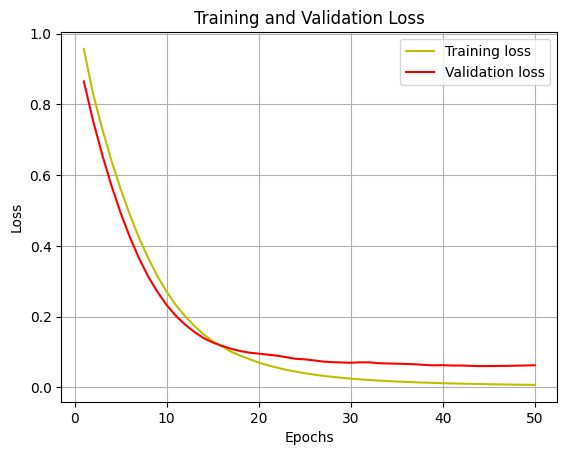

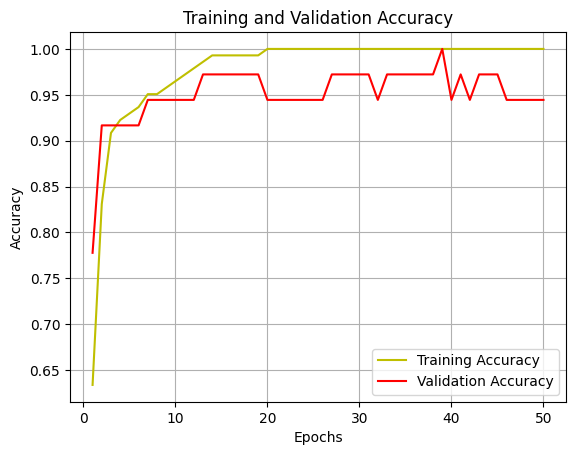

In [38]:
import matplotlib.pyplot as plt

# 1. 손실값 시각화
loss = model_history.history['loss']        # 훈련 손실
val_loss = model_history.history['val_loss']  # 검증 손실
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')   # 노란색
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 빨간색
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. 정확도 시각화
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
